In [ ]:
#Assignment 2 — Volleyball Court to Scale (Jupyter)
#This notebook draws an indoor volleyball court to scale using meters and a world→pixel mapping, then saves a PNG.

In [1]:
%pip -q install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import matplotlib.pyplot as plt

#Dimensions in meters (official indoor volleyball)
COURT_LENGTH_M = 18.0   #length
COURT_WIDTH_M  = 9.0    #width
LINE_WIDTH_M   = 0.05   #boundary/center/attack line width = 5 cm
ATTACK_DIST_M  = 3.0    #attack lines are 3 m from the centerline on EACH side

# Single scale: world (m) → pixels
SCALE_PX_PER_M = 60     #change this one number to resize everything consistently

def m_to_px(val_m: float) -> float:
    return val_m * SCALE_PX_PER_M

In [3]:
def draw_volleyball_court(save_dir="outputs"):
    # Convert world sizes to pixels
    court_len_px = m_to_px(COURT_LENGTH_M)
    court_wid_px = m_to_px(COURT_WIDTH_M)
    line_w_px    = max(1.0, m_to_px(LINE_WIDTH_M))  #keep visible

    #Figure sized to the court (roughly 100 px/inch)
    fig = plt.figure(figsize=(court_len_px/100, court_wid_px/100), dpi=100)
    ax = plt.gca()

    #Outer boundary rectangle
    outer = plt.Rectangle((0, 0), court_len_px, court_wid_px, fill=False, linewidth=line_w_px)
    ax.add_patch(outer)

    #Center line at half the court length
    center_x = m_to_px(COURT_LENGTH_M / 2)
    ax.plot([center_x, center_x], [0, court_wid_px], linewidth=line_w_px)

    #Attack lines at +-3 m from center
    attack_left_x  = center_x - m_to_px(ATTACK_DIST_M)
    attack_right_x = center_x + m_to_px(ATTACK_DIST_M)
    ax.plot([attack_left_x,  attack_left_x],  [0, court_wid_px], linewidth=line_w_px)
    ax.plot([attack_right_x, attack_right_x], [0, court_wid_px], linewidth=line_w_px)

    #Make it look right
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(0, court_len_px)
    ax.set_ylim(0, court_wid_px)
    ax.set_xticks([]); ax.set_yticks([])

    #Save PNG
    os.makedirs(save_dir, exist_ok=True)
    out_path = os.path.join(save_dir, f"volleyball_court_{int(SCALE_PX_PER_M)}pxperm.png")
    plt.savefig(out_path, bbox_inches='tight', pad_inches=0.02)
    print(f"Saved: {out_path}")

    return fig, ax

Saved: outputs\volleyball_court_60pxperm.png


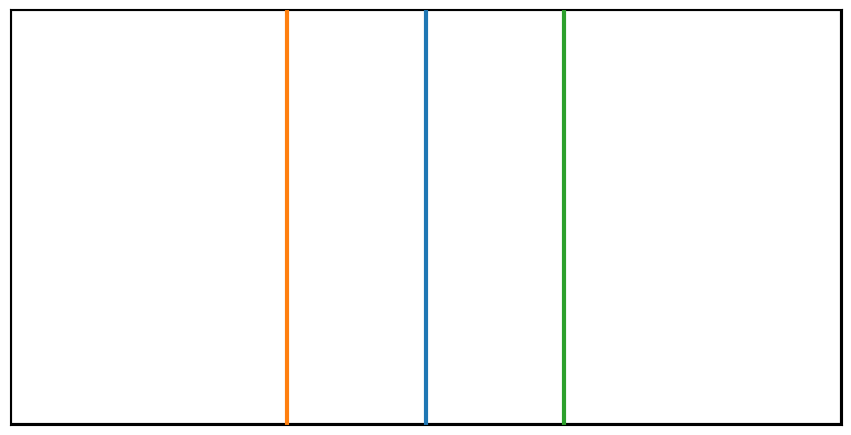

In [4]:
fig, ax = draw_volleyball_court()
plt.show()